<a href="https://colab.research.google.com/github/giakomorssi/Deloitte_Project/blob/main/04_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Results Prediction Delivery

Cloning into 'Deloitte_Project'...
remote: Enumerating objects: 192, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 192 (delta 38), reused 2 (delta 2), pack-reused 123
Receiving objects: 100% (192/192), 3.10 MiB | 21.56 MiB/s, done.
Resolving deltas: 100% (96/96), done.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 516)               57276     
                                                                 
 dense_1 (Dense)             (None, 256)               132352    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                  

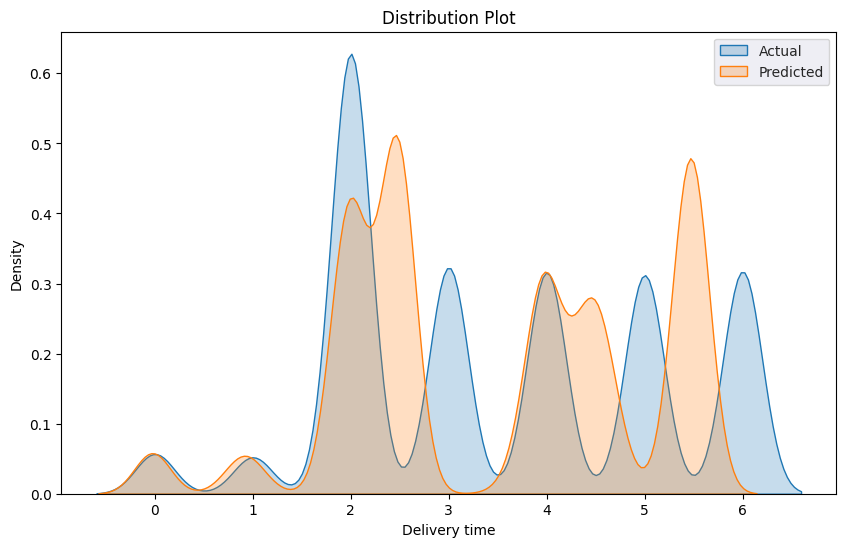

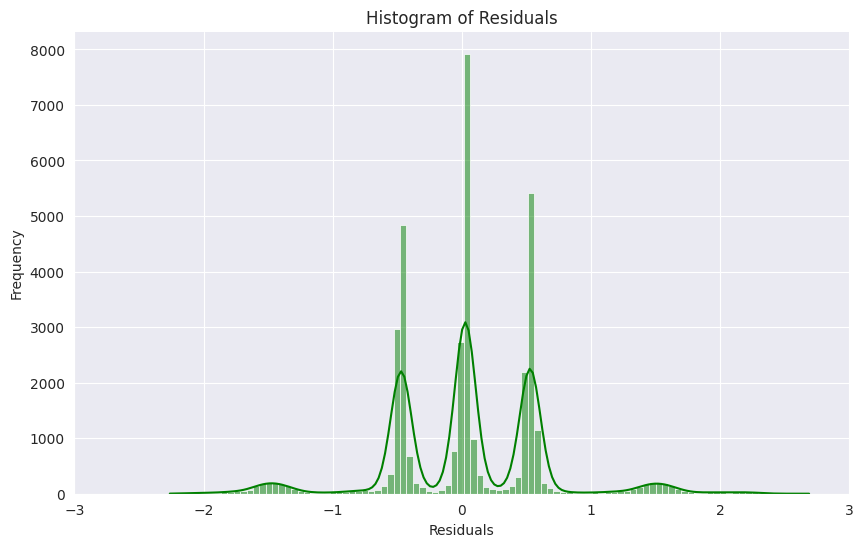



1129/1129 [==============================] - 2s 2ms/step


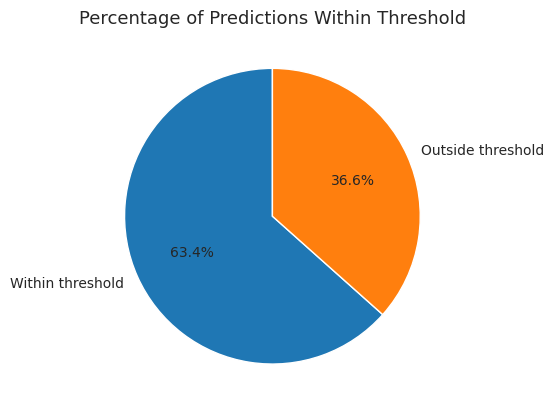

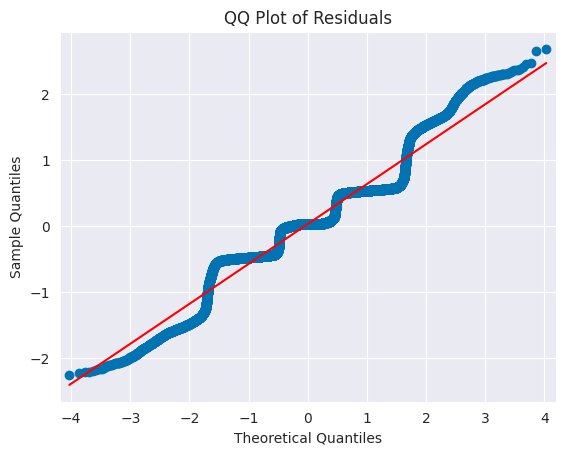

In [1]:
!rm -r Deloitte_Project
!git clone https://github.com/giakomorssi/Deloitte_Project
!pip install -q category_encoders
import sys
sys.path.append('/content/Deloitte_Project')
from functions import prediction_h5
from functions import prediction_pkl

prediction_h5('nn1.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Model: 
RandomForestRegressor() 


 rMSE Mean: 0.8222750440461857
rMSE Std: 0.0
Within Threshold Mean: 0.6317028584090405
Within Threshold Std: 0.0013943835783339343



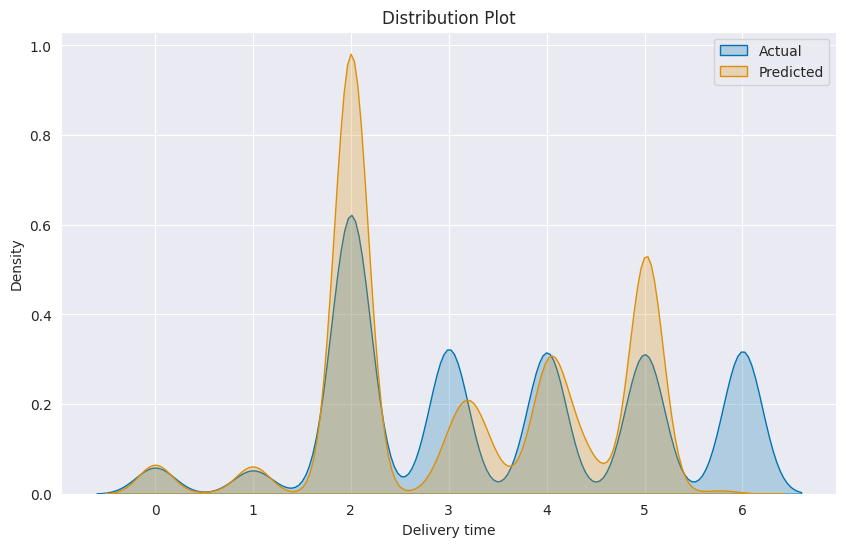

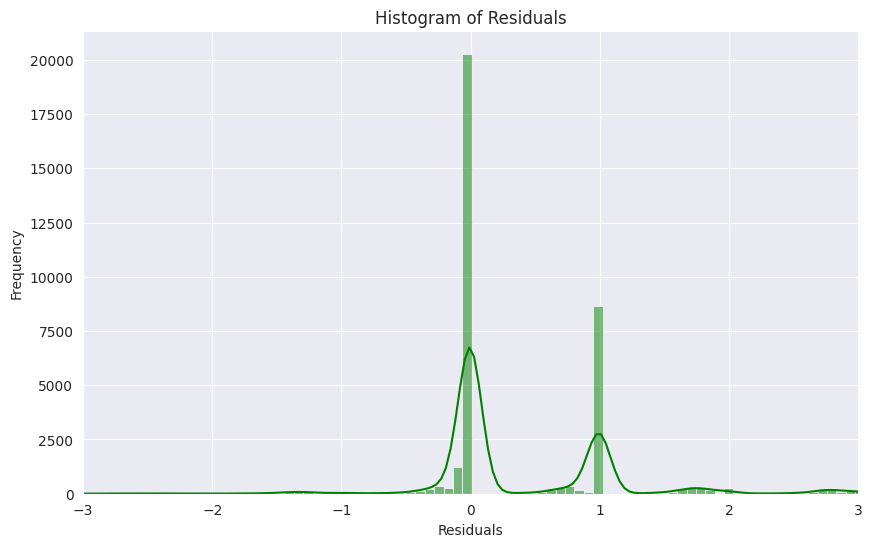

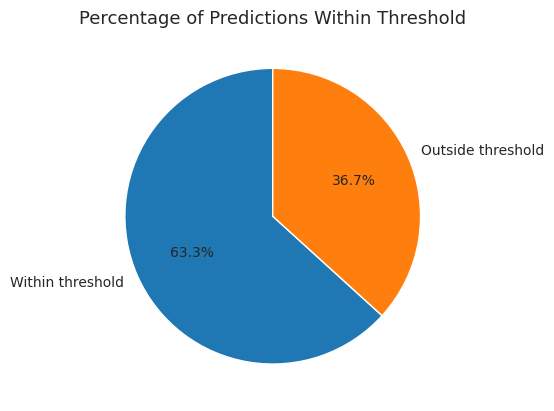

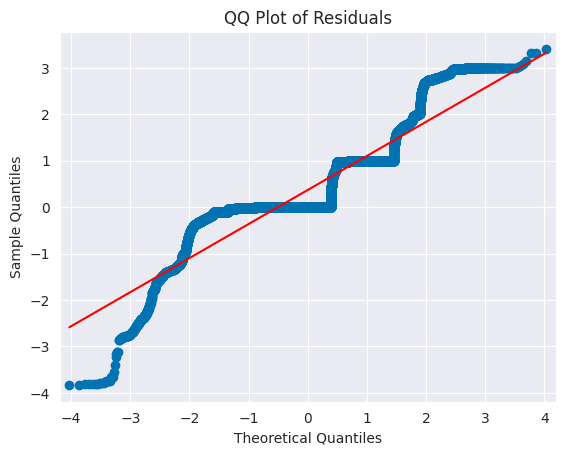

In [2]:
from functions import prediction_pkl

prediction_pkl()

# Results Fraud Detection

In [3]:
!rm -r Deloitte_Project
!git clone https://github.com/giakomorssi/Deloitte_Project
!pip install -q category_encoders
import sys
sys.path.append('/content/Deloitte_Project')
from functions import fraud_detection

fraud_detection('rf.pkl')

Cloning into 'Deloitte_Project'...
remote: Enumerating objects: 192, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 192 (delta 39), reused 2 (delta 2), pack-reused 121
Receiving objects: 100% (192/192), 3.10 MiB | 19.33 MiB/s, done.
Resolving deltas: 100% (96/96), done.

Model: 
 RandomForestClassifier(class_weight='balanced', max_depth=4) 

Iteration: 10

 Fraud Recall: 0.9999, std: 0.0004, Under 0.7: 0, []
 Suspected Recall: 0.5609, std: 0.0042
 Regular Recall: 0.8692, std: 0.0012
 Total: 0.81, std: 0.1841
Precisions [0.1538 0.9135 1.    ]

 Average Confusion Matrix:
[[8.1190e+02 1.0000e-01 0.0000e+00]
 [3.6980e+03 2.4590e+04 9.0000e-01]
 [7.3310e+02 2.3413e+03 3.9266e+03]]
